<a href="https://colab.research.google.com/github/sakib927/My-Data-Science/blob/main/Crime_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/crimedata.csv')

In [ ]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [ ]:
mydata=data.iloc[:,data.columns!='Unnamed: 0']

In [ ]:
mydata

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
scaler = MinMaxScaler()
norm_mydata=mydata.copy()
def minmaxscaler(x):
    for columnName, columnData in x.iteritems():
        x[columnName] = scaler.fit_transform(np.array(columnData).reshape(-1, 1))    

minmaxscaler(norm_mydata)
norm_mydata.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


Text(0.5, 1.0, 'Elbow Curve to find optimum K')

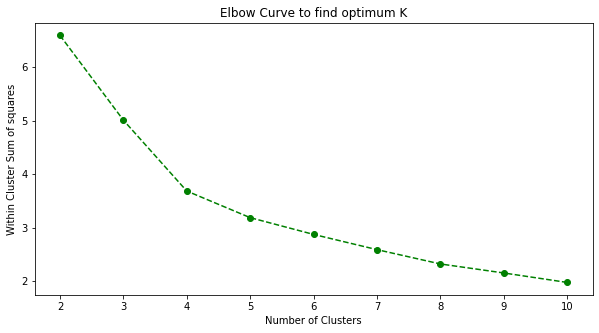

In [ ]:
k= list(range(2,11))
sum_of_squared_distances = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(norm_mydata)
    sum_of_squared_distances.append(kmeans.inertia_) 
plt.figure(figsize=(10, 5))
plt.plot(k, sum_of_squared_distances, 'go--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of squares')
plt.title('Elbow Curve to find optimum K')

In [ ]:
kmeans4 = KMeans(n_clusters = 4)

kmeans4.fit(norm_mydata)

y_pred = kmeans4.fit_predict(norm_mydata)
print(y_pred)

data['Cluster'] = y_pred+1 


[0 3 3 0 3 3 2 2 3 0 2 1 3 2 1 2 1 0 1 3 2 3 1 0 3 1 1 3 1 2 3 3 0 1 2 2 2
 2 2 0 1 0 3 2 1 2 2 1 1 2]


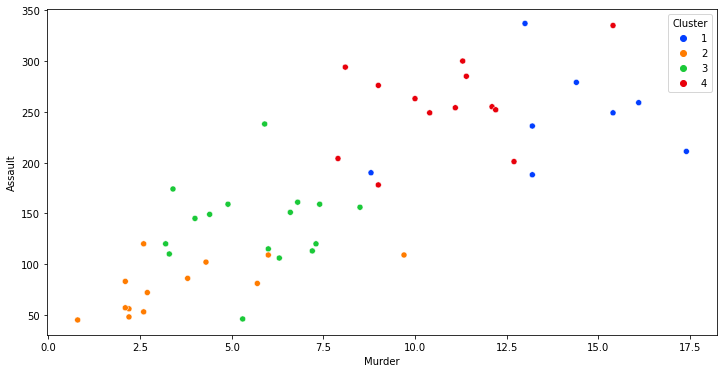

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=data['Murder'], y = data['Assault'], hue=data['Cluster'], palette='bright')